Develop a Wine classification project, predit the quality of wine, reduce the dimension of data & apply ML model

In [14]:
# import the libararies
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

Feature Reduction using PCA 

In [15]:
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [16]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
dataset.columns = ['Label', 'Alcohol', 'Nalic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthcyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [18]:
dataset

,Label,Alcohol,Nalic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthcyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
dataset.shape

(178, 14)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Nalic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthcyanins                178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [13]:
types = dataset.dtypes
print(types)

Label                             int64
Alcohol                         float64
Nalic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthcyanins                  float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [12]:
dataset['Label'].value_counts()

Label
2    71
1    59
3    48
Name: count, dtype: int64

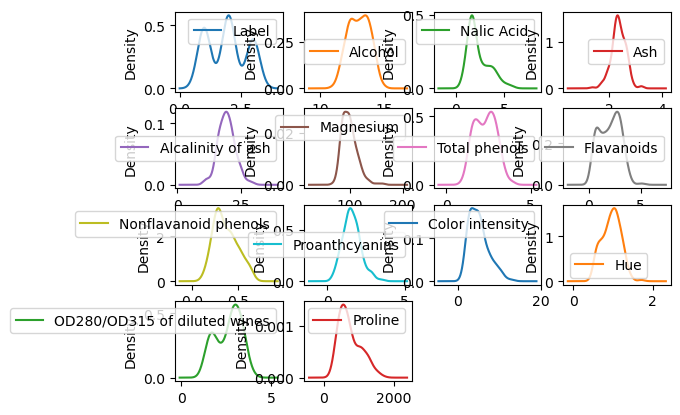

In [21]:
dataset.plot(kind='density', subplots=True, layout=(4, 4), sharex=False)
plt.show()

Label is the outcome column, rest of the columns are features

In [22]:
# Extracting features of dataset
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 0].values

In [23]:
X.shape

(178, 13)

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [38]:
# spliting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape

(142, 13)

In [40]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [42]:
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [43]:
explained_variance[:3].sum()

0.6695536580024907

In [44]:
explained_variance.cumsum()

array([0.36884109, 0.56202504, 0.66955366, 0.74377362, 0.80623266,
       0.85532266, 0.89649554, 0.92145537, 0.94454392, 0.96318516,
       0.98050282, 0.99303067, 1.        ])

In [45]:
X_train

array([[-2.17884511, -1.07218467,  0.07256566, ...,  0.1271222 ,
        -0.07901204,  0.4542412 ],
       [-1.80819239,  1.57822344,  0.00896477, ..., -0.96074782,
        -0.40434955, -0.34098912],
       [ 1.09829474,  2.22124345, -0.1093294 , ...,  1.10392771,
         0.10693966,  0.36900172],
       ...,
       [ 0.01097276,  1.99585453, -0.57933999, ..., -0.11109947,
        -0.01706346, -0.33083897],
       [ 2.89176687, -0.77155548,  1.10218748, ...,  0.13302355,
        -0.17318731, -0.22802702],
       [-2.44830439, -2.11360296,  0.79001847, ..., -0.49170902,
         0.15199135,  0.3013311 ]])

In [46]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904])

In [47]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4'], dtype=object)

In [48]:
explained_variance.cumsum()

array([0.36884109, 0.56202504, 0.66955366, 0.74377362, 0.80623266])

In [49]:
# Fitting SVM to the training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [50]:
# predict the Test set results
y_pred = classifier.predict(X_test)

In [51]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [52]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [53]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' %(accuracy_score(y_test, y_pred)*100))


Accuracy: 100.00
